In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
df=pd.read_csv('C:/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\Asus\AppData\Local\Temp\ipykernel_39832\498323903.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.read_csv('C:/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [20]:
df

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, Length: 324, dtype: int64

In [4]:
df=df.asfreq(pd.infer_freq(df.index))

In [21]:
start_date = datetime(2000,1,1)
end_date = datetime(2005,1,1)
lim_catfish_sales = df[start_date:end_date]

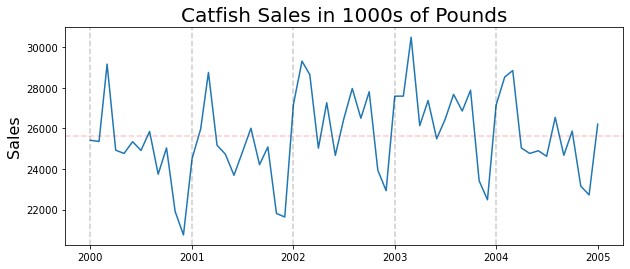

In [22]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.2, linestyle='--')

In [23]:
first_dif=lim_catfish_sales.diff()[1:]

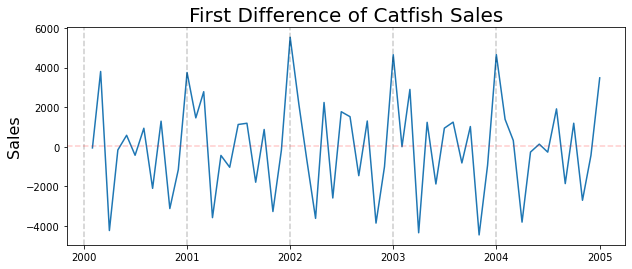

In [24]:
plt.figure(figsize=(10,4))
plt.plot(first_dif)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_dif.mean(), color='r', alpha=0.2, linestyle='--')

In [25]:
acf_vals=acf(first_dif)

<BarContainer object of 17 artists>

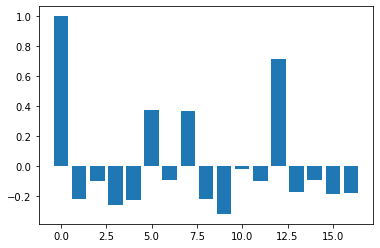

In [26]:
num_lags=17
plt.bar(range(num_lags), acf_vals[:num_lags])

In [27]:
pacf_vals=pacf(first_dif)

<BarContainer object of 17 artists>

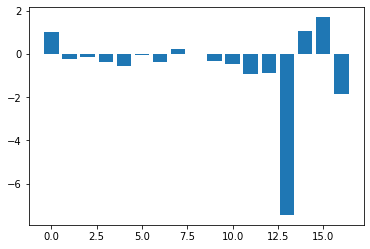

In [28]:
plt.bar(range(num_lags),pacf_vals[:num_lags])

In [35]:
train_end=datetime.datetime(2003,7,1)
test_end=datetime.datetime(2004,1,1)

In [37]:
train_data=first_dif[:train_end]
test_data=first_dif[train_end+timedelta(days=1):test_end]

In [53]:
model=ARIMA(train_data,order=(13,1,1))

In [54]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 0.806004524230957


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                ARIMA(13, 1, 1)   Log Likelihood                -353.966
Date:                Fri, 08 Mar 2024   AIC                            737.932
Time:                        23:57:32   BIC                            763.636
Sample:                    02-01-2000   HQIC                           747.292
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8512      0.416     -2.046      0.041      -1.666      -0.036
ar.L2         -1.0879      0.615     -1.769      0.077      -2.293       0.117
ar.L3         -1.1308      0.662     -1.708      0.0

In [56]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [57]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

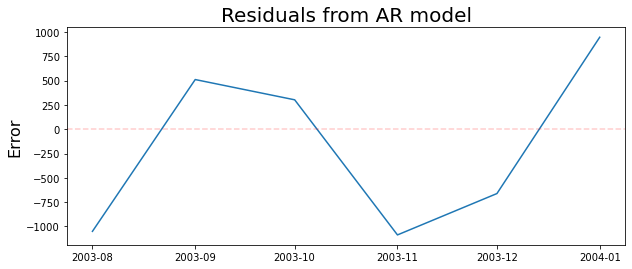

In [58]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)


Text(0, 0.5, 'Sales')

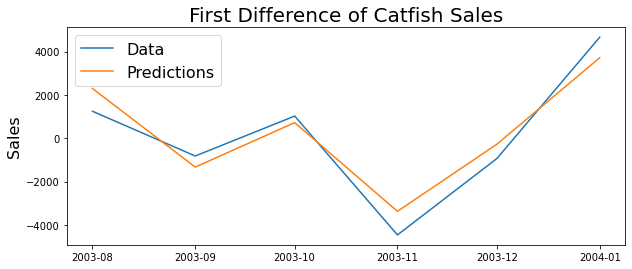

In [59]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [60]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 813.2812565565291
